### Obwody z zadań programistycznych

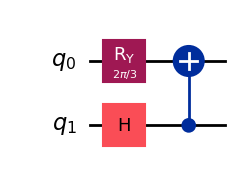

In [2]:
import warnings
warnings.filterwarnings("ignore")
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit.visualization import array_to_latex
import numpy as np

qc= QuantumCircuit(2)
qc.ry(2 * np.pi/3,0)
qc.h(1)
qc.cx(1, 0)
qc.draw('mpl')

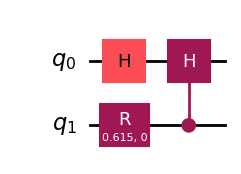

In [7]:
qc= QuantumCircuit(2)
qc.h(0)
qc.r(theta=0.615,phi = 0, qubit=1)
qc.ch(1, 0)
qc.draw('mpl')

### Porównanie histogramów i dokładnych wyliczeń

In [14]:
qc= QuantumCircuit(2)
qc.ry(2 * np.pi/3,0)
qc.h(1)
qc.cx(1, 0)

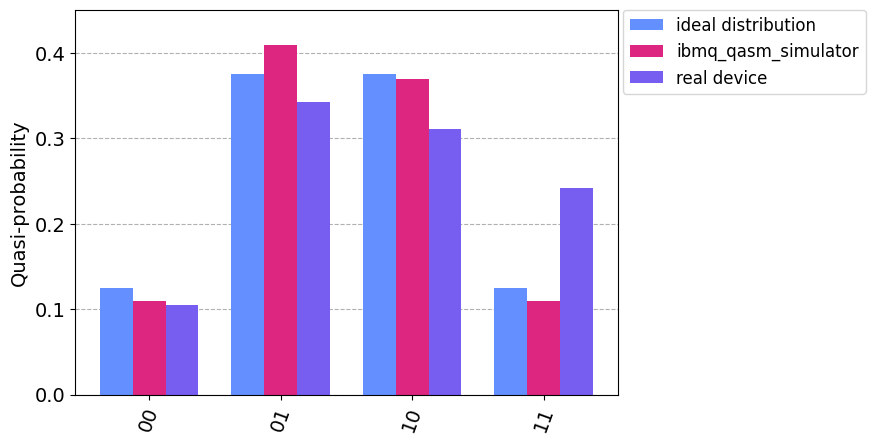

In [15]:
state = Statevector.from_instruction(qc)
ideal_distribution = state.probabilities_dict()
qc.measure_all()
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
backend=service.backend('ibmq_qasm_simulator')
from qiskit_ibm_runtime import  Batch, Sampler
with Batch(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(
        circuits=[qc],
        shots=100,
    )
    result_sim = job.result()
backend=service.backend('ibm_osaka')
t_qc = transpile(qc, backend, optimization_level=0, seed_transpiler=0)
with Batch(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(
        circuits=[t_qc],
        shots=100,
    )
    result_dev = job.result()
binary_prob = [ideal_distribution, result_sim.quasi_dists[0].binary_probabilities(), result_dev.quasi_dists[0].binary_probabilities()]
plot_histogram(
    binary_prob,
    bar_labels=False,
    legend=[
        "ideal distribution",
        "ibmq_qasm_simulator",
        "real device",
    ],
)

### Różnice między obwodem użytkownika a obwodem otrzymanym z transpilera

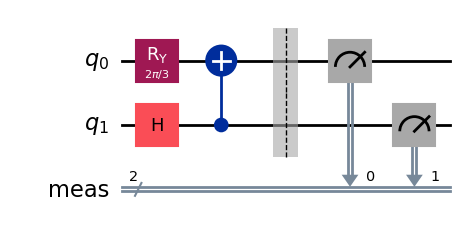

In [17]:
qc.draw('mpl')

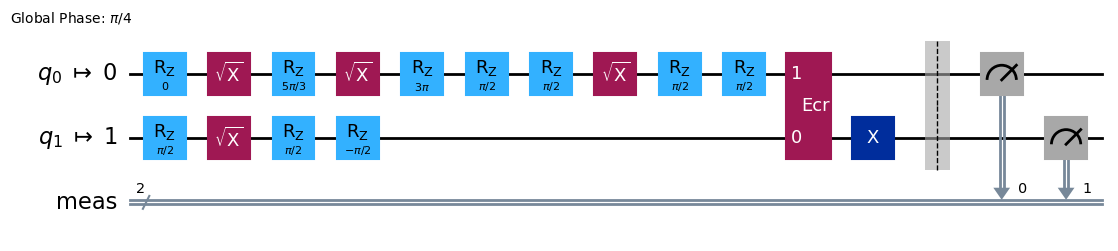

In [18]:
t_qc.draw(output="mpl", style="iqp", idle_wires=False)

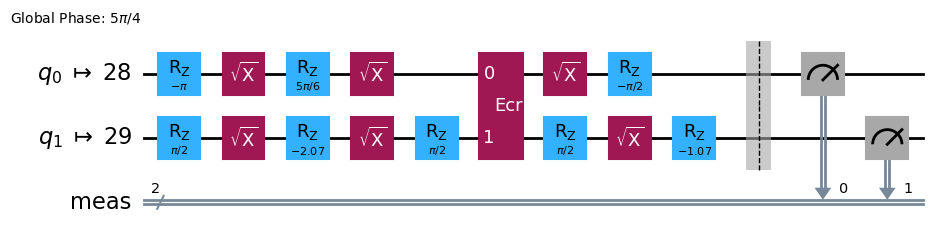

In [19]:
t_qc = transpile(qc, backend, optimization_level=3, seed_transpiler=0)
t_qc.draw(output="mpl", style="iqp", idle_wires=False)